# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


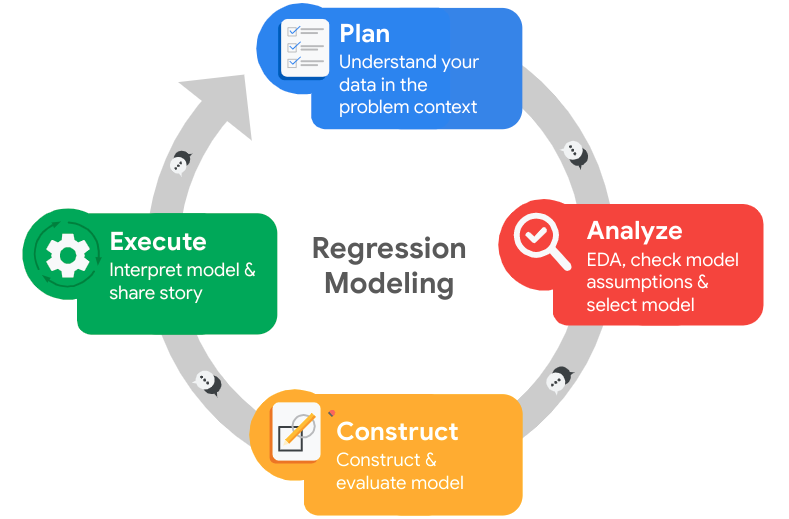

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. hr
2. 预测员工是否离职以及可能得离职因素
3. 数据清洗和整理
4. 基于树的模型
5. 保密

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [25]:
pip install --upgrade scikit-learn joblib

     |████████████████████████████████| 24.8 MB 41.0 MB/s            
     |████████████████████████████████| 302 kB 114.9 MB/s            
  Attempting uninstall: joblib
    Found existing installation: joblib 0.14.1
    Uninstalling joblib-0.14.1:
      Successfully uninstalled joblib-0.14.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [10]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
duplicate_rows=df0[df0.duplicated(keep=False)]
duplicate_rows

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1=df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

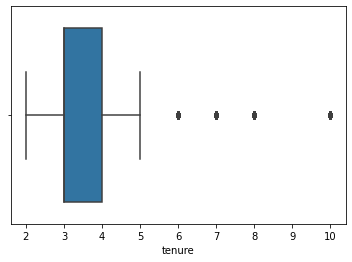

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
import seaborn as sns
sns.boxplot(x=df1['tenure'])


In [13]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
Q1=df1['tenure'].quantile(0.25)
Q3=df1['tenure'].quantile(0.75)
IQR=Q3-Q1
lower_band=Q1-1.5*IQR
upper_band=Q3+1.5*IQR
has_outliers_rows=df1[(df1['tenure']<lower_band)|(df1['tenure']>upper_band)]
len(has_outliers_rows)

824

In [14]:
df1=df1[(df1['tenure']>=lower_band)&(df1['tenure']<=upper_band)]

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
number=df1['left'].value_counts()
percentage=df1['left'].value_counts(normalize=True)
frequency_table=pd.merge(number,percentage,left_index=True,right_index=True).reset_index()
frequency_table.columns=['left','frequency','percentage']
frequency_table

,left,frequency,percentage
0,0,9285,0.831468
1,1,1882,0.168532


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 1.0, 'left vs satisfaction level')

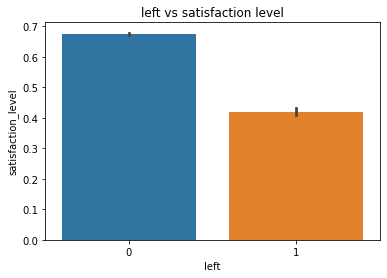

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
sns.barplot(data=df1,x='left',y='satisfaction_level')
plt.title('left vs satisfaction level')

Text(0.5, 1.0, ' tenure vs satisfaction_level via left')

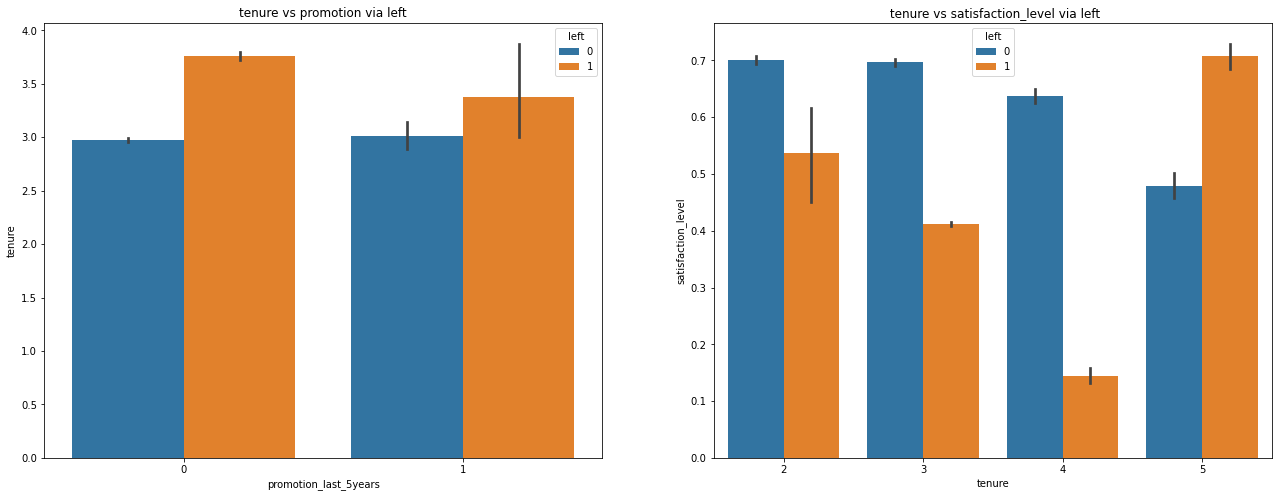

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
fig,ax=plt.subplots(1, 2, figsize = (22,8))
sns.barplot(data=df1,x='promotion_last_5years',y='tenure',hue='left',ax=ax[0])
ax[0].set_title('tenure vs promotion via left')

sns.barplot(data=df1, x='tenure',y='satisfaction_level', hue='left',ax=ax[1])
ax[1].set_title(' tenure vs satisfaction_level via left')

Text(0.5, 1.0, ' number of project vs left')

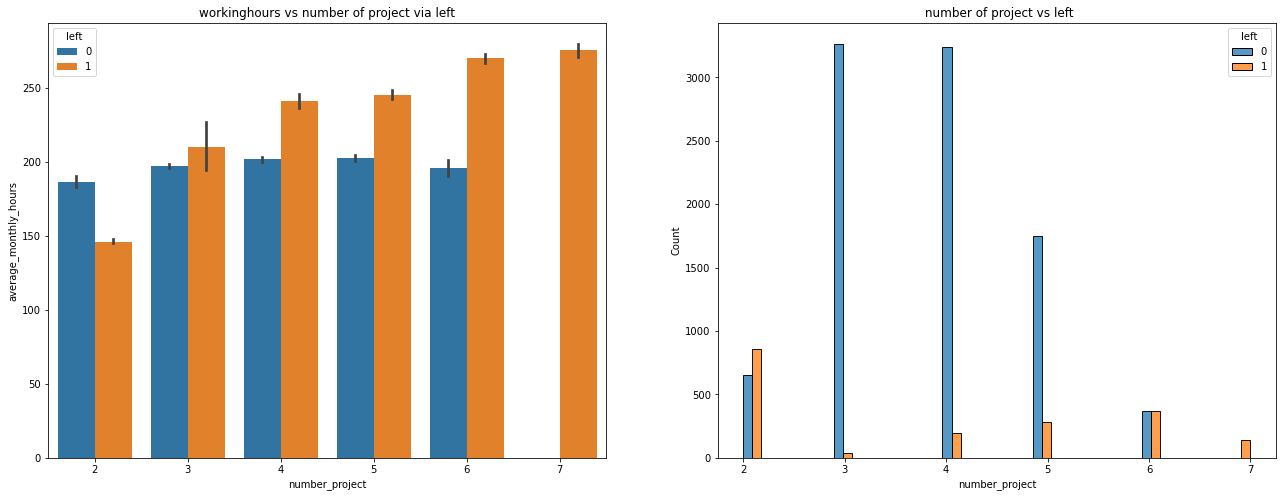

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
fig,ax=plt.subplots(1, 2, figsize = (22,8))
sns.barplot(data=df1,x='number_project',y='average_monthly_hours',hue='left',ax=ax[0])
ax[0].set_title('workinghours vs number of project via left')

sns.histplot(data=df1, x='number_project', hue='left',multiple='dodge',ax=ax[1])
ax[1].set_title(' number of project vs left')

Text(0.5, 1.0, 'workinghours vs satisfaction via left')

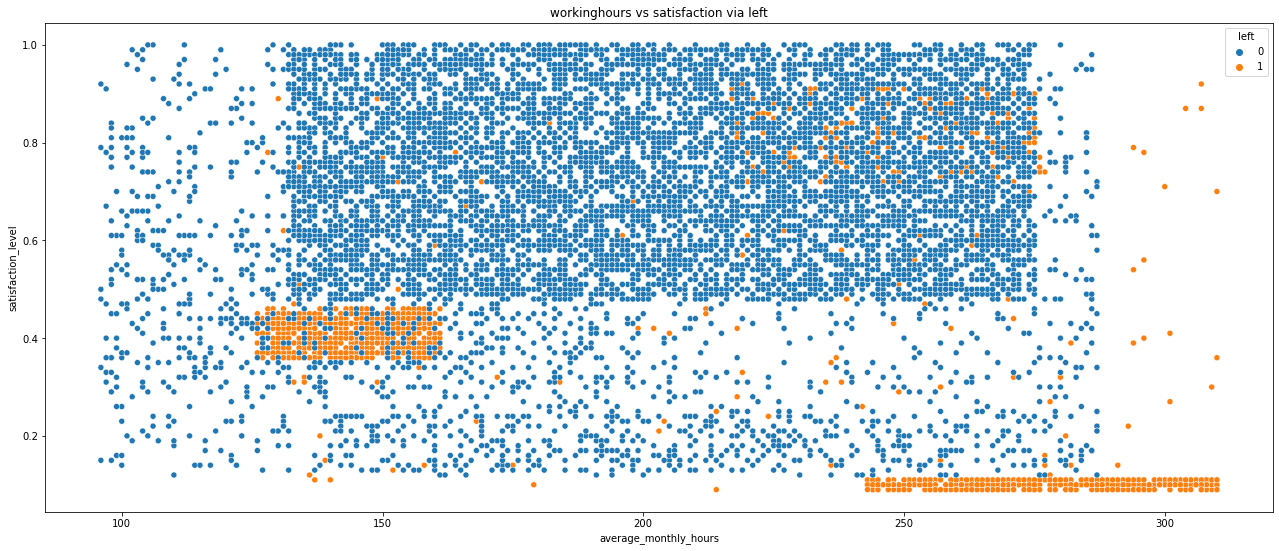

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(22,9))
sns.scatterplot(data=df1,x='average_monthly_hours',y='satisfaction_level',hue='left')
plt.title('workinghours vs satisfaction via left')

Text(0.5, 1.0, ' workinghours vs performance via left')

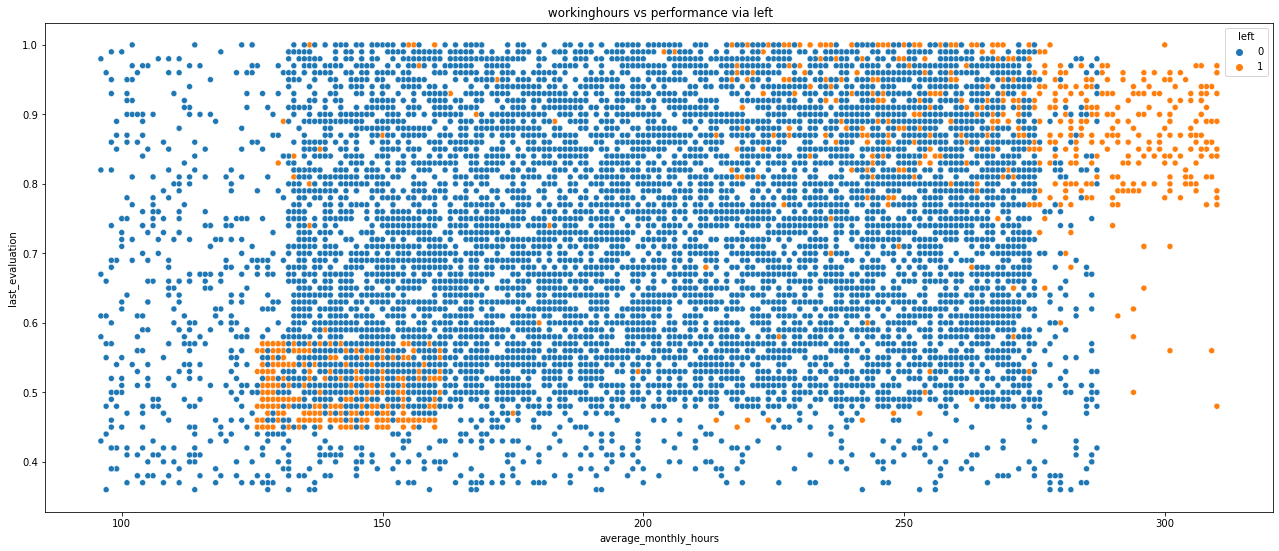

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(22,9))
sns.scatterplot(data=df1,x='average_monthly_hours',y='last_evaluation',hue='left')
plt.title(' workinghours vs performance via left')

Text(0.5, 1.0, ' tenure vs salary vs satisfaction in remaining employees')

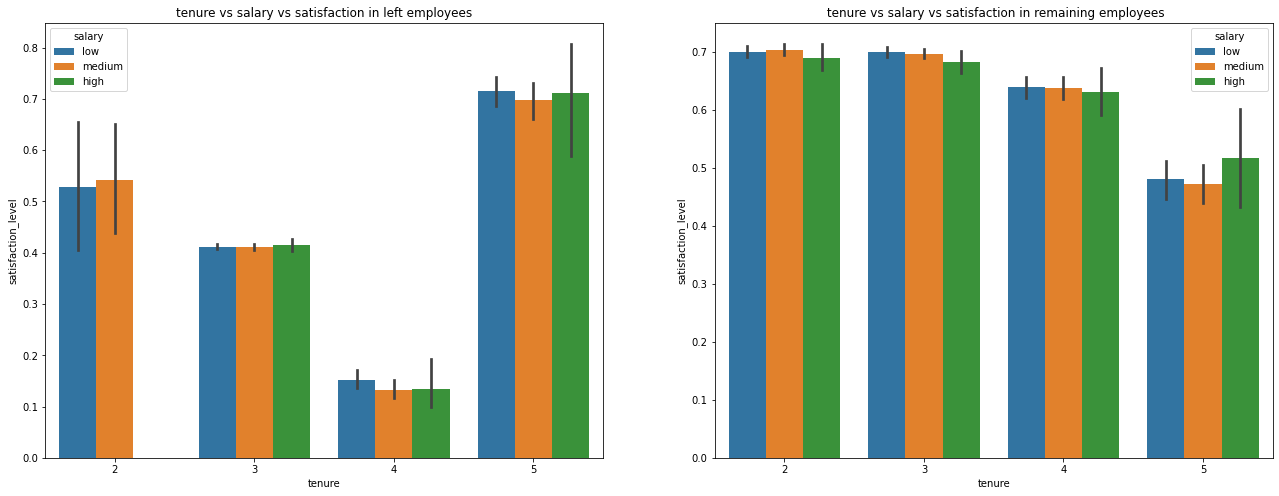

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
fig,ax=plt.subplots(1, 2, figsize = (22,8))
sns.barplot(data=df1[df1['left']==1],x='tenure',y='satisfaction_level',hue='salary',ax=ax[0])
ax[0].set_title('tenure vs salary vs satisfaction in left employees')

sns.barplot(data=df1[df1['left']==0],x='tenure',y='satisfaction_level',hue='salary',ax=ax[1])
ax[1].set_title(' tenure vs salary vs satisfaction in remaining employees')

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [ ]:
#1.编码

In [22]:
### YOUR CODE HERE ###
df1.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder

df1['department'] = LabelEncoder().fit_transform(df1['department'].astype(str))
df1['salary'] = LabelEncoder().fit_transform(df1['salary'].astype(str))

In [ ]:
#X,y划分

In [24]:
from sklearn.model_selection import train_test_split
y=df1['left']
X=df1.copy().drop('left',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
X_tr,X_val,y_tr,y_val=train_test_split(X_train,y_train,test_size=0.25,stratify=y_train,random_state=42)

In [25]:
#logistic建模
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression().fit(X_train,y_train)

In [26]:
#logistic结果
lr.coef_

array([[-4.44806429e+00, -1.83961197e-01, -4.90032146e-01,
         3.78707826e-03,  1.10532566e+00, -1.35905749e+00,
        -5.87464761e-01,  2.85537615e-02, -1.02084295e-02]])

In [27]:
lr.intercept_

array([-1.65417538])

In [28]:
#混淆矩阵函数
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay
def confusionmatrix(model,y_preds_model):
    cm=metrics.confusion_matrix(y_test,y_preds_model,labels=model.classes_)
    disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()

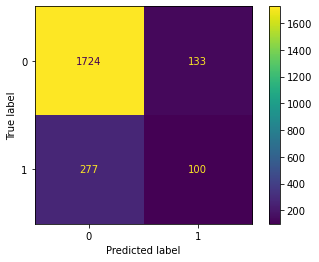

In [29]:
#logistic的混淆矩阵：
y_preds_lr=lr.predict(X_test)
confusionmatrix(lr,y_preds_lr)

In [30]:
#logistic的准确率们
from sklearn.metrics import classification_report
target_labels=['remaining','left']
print(classification_report(y_test,y_preds_lr,target_names=target_labels))

              precision    recall  f1-score   support

   remaining       0.86      0.93      0.89      1857
        left       0.43      0.27      0.33       377

    accuracy                           0.82      2234
   macro avg       0.65      0.60      0.61      2234
weighted avg       0.79      0.82      0.80      2234



## 基于树的模型

In [31]:
#决策树
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier(random_state=42)
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 10],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate GridSearch
dt_cv= GridSearchCV(dt, cv_params, scoring=scoring, cv=4, refit='f1')
dt_cv.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 4, 6]},
             refit='f1', scoring={'precision', 'f1', 'accuracy', 'recall'})

In [32]:
dt_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=6,
                       random_state=42)

In [33]:
dt_cv.best_score_

0.9458438507453659

In [34]:
dt_cv.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [35]:
def make_results(model_name,model_object):
    cv_results=pd.DataFrame(model_object.cv_results_)
    best_estimator_results=cv_results.iloc[cv_results['mean_test_f1'].idxmax(),:]
    f1=best_estimator_results.mean_test_f1
    recall=best_estimator_results.mean_test_recall
    precision=best_estimator_results.mean_test_precision
    accuracy=best_estimator_results.mean_test_accuracy
    table=pd.DataFrame({'Model':[model_name],
                       'F1':[f1],
                       'Accuracy':[accuracy],
                       'Precision':[precision],
                       'Recall':[recall]
                       })
    return table

In [36]:
dt_resultable=make_results('DT CV',dt_cv)
dt_resultable

,Model,F1,Accuracy,Precision,Recall
0,DT CV,0.945844,0.982312,0.976005,0.917596


In [37]:
#随机森林
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1'}
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

In [38]:
rf_cv.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='f1', scoring={'precision', 'f1', 'accuracy', 'recall'})

In [39]:
rf_cv.best_score_

0.9500787245915209

In [40]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [41]:
rf_cv.best_estimator_

RandomForestClassifier(max_features=1.0, max_samples=1.0, min_samples_split=4,
                       n_estimators=500, random_state=42)

In [42]:
rf_resultable=make_results('RF CV',rf_cv)
rf_resultable

,Model,F1,Accuracy,Precision,Recall
0,RF CV,0.950079,0.983768,0.985258,0.917599


In [71]:
results=pd.concat([dt_resultable,rf_resultable],axis=0)
results

,Model,F1,Accuracy,Precision,Recall
0,DT CV,0.945844,0.982312,0.976005,0.917596
0,RF CV,0.950079,0.983768,0.985258,0.917599


In [44]:
# XGBoost
from xgboost import XGBClassifier
xgb=XGBClassifier(objective='binary:logistic',random_state=42)
cv_params = {'max_depth': [4,6], 
             'min_child_weight': [3],
             'learning_rate': [0.1],
             'n_estimators': [300],
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1'}
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

In [45]:
%%time
xgb_cv.fit(X_train,y_train)

CPU times: user 55min 55s, sys: 11.1 s, total: 56min 6s
Wall time: 28min 4s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [46]:
xgb_cv.best_score_

0.9404155603755016

In [47]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 300}

In [48]:
xgb_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [49]:
xgb_resultable=make_results('XGB CV',xgb_cv)
xgb_resultable

,Model,F1,Accuracy,Precision,Recall
0,XGB CV,0.940416,0.980521,0.969615,0.91295


In [72]:
results=pd.concat([results,xgb_resultable],axis=0)
results

,Model,F1,Accuracy,Precision,Recall
0,DT CV,0.945844,0.982312,0.976005,0.917596
0,RF CV,0.950079,0.983768,0.985258,0.917599
0,XGB CV,0.940416,0.980521,0.969615,0.912950


In [57]:
def get_scores(model_name:str, preds, y_test_data):

    accuracy = metrics.accuracy_score(y_test_data, preds)
    precision = metrics.precision_score(y_test_data, preds)
    recall = metrics.recall_score(y_test_data, preds)
    f1 = metrics.f1_score(y_test_data, preds)

    table = pd.DataFrame({'Model': [model_name],
                          'Precision': [precision], 
                          'Recall': [recall],
                          'F1': [f1],
                          'Accuracy': [accuracy]
                         })
  
    return table

In [52]:
#dt在验证集验证
dt_val_preds=dt_cv.best_estimator_.predict(X_val)

In [58]:
#dt的验证结果
dt_val_scores=get_scores('DT VAL',dt_val_preds,y_val)
dt_val_scores

,Model,Precision,Recall,F1,Accuracy
0,DT VAL,0.991549,0.93617,0.963064,0.987914


In [73]:
#更新results表
results=pd.concat([results,dt_val_scores],axis=0)
results

,Model,F1,Accuracy,Precision,Recall
0,DT CV,0.945844,0.982312,0.976005,0.917596
0,RF CV,0.950079,0.983768,0.985258,0.917599
0,XGB CV,0.940416,0.980521,0.969615,0.912950
0,DT VAL,0.963064,0.987914,0.991549,0.936170


In [74]:
#rf的验证
rf_val_preds=rf_cv.best_estimator_.predict(X_val)
rf_val_scores=get_scores('RF VAL',rf_val_preds,y_val)
rf_val_scores

,Model,Precision,Recall,F1,Accuracy
0,RF VAL,0.997283,0.976064,0.986559,0.995524


In [75]:
#更新results表
results=pd.concat([results,rf_val_scores],axis=0)
results

,Model,F1,Accuracy,Precision,Recall
0,DT CV,0.945844,0.982312,0.976005,0.917596
0,RF CV,0.950079,0.983768,0.985258,0.917599
0,XGB CV,0.940416,0.980521,0.969615,0.912950
0,DT VAL,0.963064,0.987914,0.991549,0.936170
0,RF VAL,0.986559,0.995524,0.997283,0.976064


In [76]:
#xgb的验证
xgb_val_preds=xgb_cv.best_estimator_.predict(X_val)
xgb_val_scores=get_scores('XGB VAL',xgb_val_preds,y_val)
xgb_val_scores

,Model,Precision,Recall,F1,Accuracy
0,XGB VAL,0.997275,0.973404,0.985195,0.995076


In [77]:
#更新results表
results=pd.concat([results,xgb_val_scores],axis=0)
results

,Model,F1,Accuracy,Precision,Recall
0,DT CV,0.945844,0.982312,0.976005,0.917596
0,RF CV,0.950079,0.983768,0.985258,0.917599
0,XGB CV,0.940416,0.980521,0.969615,0.912950
0,DT VAL,0.963064,0.987914,0.991549,0.936170
0,RF VAL,0.986559,0.995524,0.997283,0.976064
0,XGB VAL,0.985195,0.995076,0.997275,0.973404


In [78]:
#RF可以就选RF
rf_test_preds=rf_cv.best_estimator_.predict(X_test)
rf_test_scores=get_scores('RF TEST',rf_test_preds,y_test)
rf_test_scores

,Model,Precision,Recall,F1,Accuracy
0,RF TEST,0.994382,0.938992,0.965894,0.988809


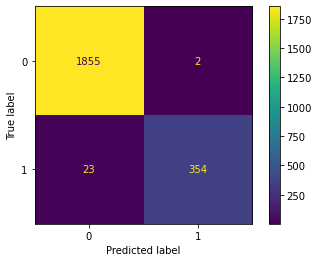

In [79]:
#混淆矩阵
confusionmatrix(rf_cv,rf_test_preds)

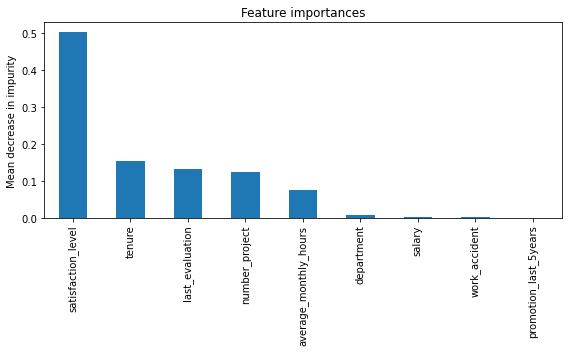

In [81]:
#看特征重要性
importances=rf_cv.best_estimator_.feature_importances_
rf_importances=pd.Series(importances,index=X_test.columns)
rf_importances=rf_importances.sort_values(ascending=False)[:15]
fig,ax=plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

#总结：
satisfaction_level是预测离职的最重要原因
tenure、last_evaluation、number_project等重要性几乎一样
每月平均工资其次，部门、工资等对离职的影响不大

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.